## Part 1: Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 2: Import processed data

In [2]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data


,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

Splitting data 

In [3]:

#splitting the data into train, validation, test
X, X_test, y, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2, random_state=42)

In [4]:
#splitting the data into train and validation
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75, random_state=42)

In [5]:
X_train.sample(5)

13634                   niggahs watch fucking hate bitches
10315    jamming skid rowkixcinderelladamn yankeesbon j...
3974                                        prairie nigger
22436                    bitch mad man cheated cheated mad
14627                                         really bitch
Name: tweet, dtype: object

## Part 4: Feature Extraction

## Count Vectorization

Word n grams: unigrams

In [6]:
#Count Vectorizing the X_train
count_vec = CountVectorizer(ngram_range=(1,3))
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_cv
X_cv_count = count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'stop': 138748,
 'spoiling': 136495,
 'fags': 47977,
 'stop spoiling': 138951,
 'spoiling fags': 136496,
 'stop spoiling fags': 138952,
 'wcw': 158835,
 'babes': 7696,
 'love': 91339,
 'thse': 147407,
 'sexy': 129127,
 'bitches': 16771,
 'bestfriend': 11076,
 'babe': 7675,
 'wcw babes': 158838,
 'babes love': 7697,
 'love thse': 91821,
 'thse sexy': 147408,
 'sexy bitches': 129146,
 'bitches bestfriend': 16893,
 'bestfriend babe': 11077,
 'wcw babes love': 158839,
 'babes love thse': 7698,
 'love thse sexy': 91822,
 'thse sexy bitches': 147409,
 'sexy bitches bestfriend': 129147,
 'bitches bestfriend babe': 16894,
 'yanks': 166065,
 'coming': 30448,
 'disparagement': 39021,
 'pride': 115956,
 'yanks coming': 166073,
 'coming disparagement': 30461,
 'disparagement pride': 39022,
 'yanks coming disparagement': 166074,
 'coming disparagement pride': 30462,
 'rather': 120021,
 'jack': 78119,
 'fuck': 53410,
 'hoes': 70183,
 'tbh': 143207,
 'shit': 129874,
 'boring': 20108,
 'give': 59478,

Vocabulary of train and test set with respective counts

In [7]:
words = []
amounts = []
for key, value in count_vec.vocabulary_.items():
    words.append(key)
    amounts.append(value)

word_counts = pd.DataFrame(words, columns = ["words"])
word_counts["amounts"] = amounts

In [8]:
word_counts.sort_values(by = "amounts", ascending = False, inplace = True)

TFIDF Vectorization

In [9]:
#TFIDF Vectorizing the X_train

tfidf = TfidfVectorizer()

X_train_tf = tfidf.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

#Vectorizing the X_cv
X_cv_tf = tfidf.transform(X_cv)
X_cv_tf = X_cv_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf = tfidf.transform(X_test)
X_test_tf = X_test_tf.toarray()


Balancing training data

In [10]:

def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

## Oversampling

Oversampling CountVectorized training data

In [11]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})


KeyboardInterrupt: 

Oversampling TFIDF-Vectorized  training data

In [ ]:
X_train_over_tf, y_train_over_tf = oversample(X_train_tf, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


## Models

In [ ]:
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_preds, y_test)
    print("The confusion matrix:")
    print(cm)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap((cm_percent), annot = True, cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

## LinearSVC

## Count Vectorization

Linear SVC and data with CountVectorizations

In [ ]:
# Initalising model
svc = LinearSVC(random_state= 424, max_iter = 20000)

# Train and predict
svc.fit(X_train_over_count, y_train_over_count)
y_preds = svc.predict(X_cv_count)


c:\miniconda\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        Hate       0.25      0.35      0.29       269
   Offensive       0.92      0.90      0.91      3670
     Neither       0.80      0.80      0.80       834

    accuracy                           0.85      4773
   macro avg       0.65      0.68      0.66      4773
weighted avg       0.86      0.85      0.85      4773

The confusion matrix:
[[  93  246   40]
 [ 140 3289  130]
 [  36  135  664]]


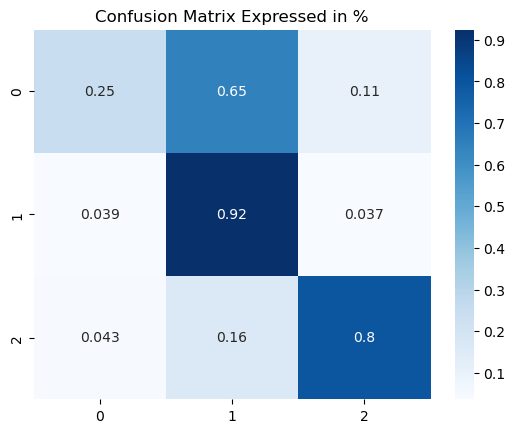

In [ ]:
# output statistics
printModelStats(y_preds, y_cv)

Gridsearch for optimization

In [ ]:
# param_grid = {
#     "penalty":["l1", "l2"],
#     "C":[ 0.1, 1, 10],
#     "dual" : ["auto"] }

# svc = LinearSVC(random_state= 424, max_iter = 20000)

# grid_search_svc_count = GridSearchCV(svc, param_grid, cv = 5)
# grid_search_svc_count.fit(X_train_over_count, y_train_over_count)
# grid_search_svc_count.best_params_
    
# best_params_:{'C': 10, 'dual': 'auto', 'penalty': 'l1'}

SVM Model with best parameters for Count Vectorizations

In [ ]:
# Initalising model
svc = LinearSVC(random_state= 424, C=10, penalty= 'l1', max_iter= 20000, dual = "auto")

# Train and predict
svc.fit(X_train_over_count, y_train_over_count)
y_preds = svc.predict(X_cv_count)


              precision    recall  f1-score   support

        Hate       0.23      0.32      0.27       269
   Offensive       0.91      0.90      0.90      3670
     Neither       0.79      0.72      0.76       834

    accuracy                           0.84      4773
   macro avg       0.64      0.65      0.64      4773
weighted avg       0.85      0.84      0.84      4773

The confusion matrix:
[[  86  244   43]
 [ 147 3306  190]
 [  36  120  601]]


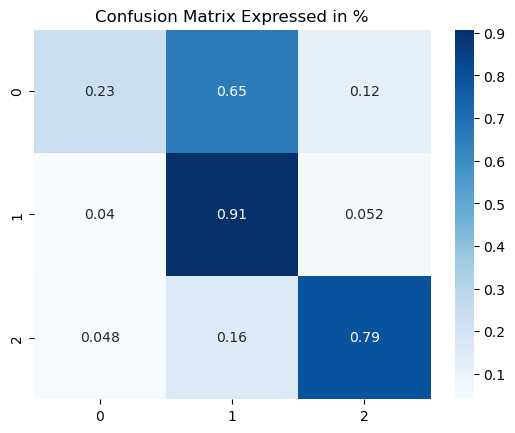

In [ ]:
# output statistics
printModelStats(y_preds, y_cv)

## TFIDF

Linear SVC and data with TFIDF Vectorizations

In [ ]:
# Initalising model
svc = LinearSVC(random_state = 424, max_iter = 10000)

# Train and predict
svc.fit(X_train_over_tf, y_train_over_tf)
y_preds = svc.predict(X_cv_tf)



c:\miniconda\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        Hate       0.26      0.36      0.30       269
   Offensive       0.93      0.89      0.91      3670
     Neither       0.79      0.84      0.81       834

    accuracy                           0.85      4773
   macro avg       0.66      0.70      0.68      4773
weighted avg       0.87      0.85      0.86      4773

The confusion matrix:
[[  97  244   29]
 [ 136 3275  107]
 [  36  151  698]]


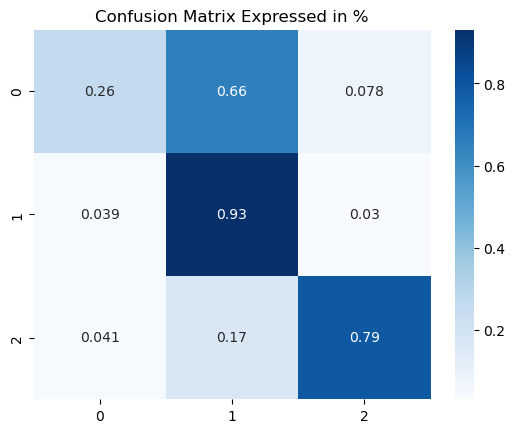

In [ ]:
# output statistics
printModelStats(y_preds, y_cv)

Grid Search for SVM with TFIDF

In [ ]:
# param_grid = {
#     "penalty":["l1", "l2"],
#     "C":[ 0.1, 1, 10],
#     "dual" : ["auto"] }

# svc = LinearSVC(random_state= 424, max_iter = 20000)

# grid_search_svc_tf = GridSearchCV(svc, param_grid, cv = 5)
# grid_search_svc_tf.fit(X_train_over_tf, y_train_over_tf)
# grid_search_svc_tf.best_params_

# best params:  {'C': 10, 'dual': 'auto', 'penalty': 'l1'}

Optimal model

In [ ]:
# Initalising model
svc = LinearSVC(random_state = 424, max_iter = 20000, penalty = "l1", C =10, dual = "auto")

# Train and predict
svc.fit(X_train_over_tf, y_train_over_tf)
y_preds = svc.predict(X_cv_tf)



              precision    recall  f1-score   support

        Hate       0.25      0.33      0.29       280
   Offensive       0.91      0.90      0.91      3715
     Neither       0.82      0.75      0.79       778

    accuracy                           0.85      4773
   macro avg       0.66      0.66      0.66      4773
weighted avg       0.86      0.85      0.85      4773

The confusion matrix:
[[  91  242   24]
 [ 176 3361  168]
 [  13  112  586]]


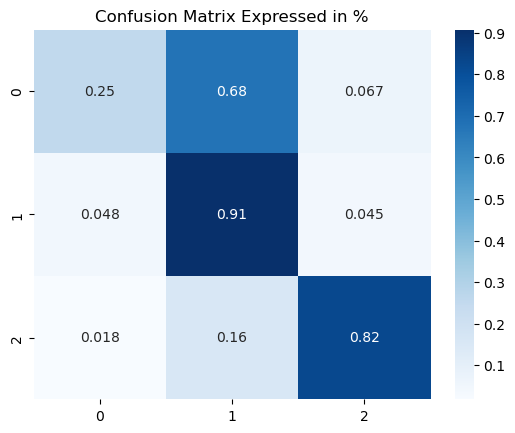

In [ ]:
# output statistics
printModelStats(y_preds, y_cv)